In [1]:
import xgboost as xgb

In [2]:
help(xgb)

Help on package xgboost:

NAME
    xgboost - XGBoost: eXtreme Gradient Boosting library.

DESCRIPTION
    Contributors: https://github.com/dmlc/xgboost/blob/master/CONTRIBUTORS.md

PACKAGE CONTENTS
    callback
    compat
    core
    libpath
    plotting
    rabit
    sklearn
    training

CLASSES
    builtins.object
        xgboost.core.Booster
        xgboost.core.DMatrix
    sklearn.base.BaseEstimator(builtins.object)
        xgboost.sklearn.XGBModel
            xgboost.sklearn.XGBClassifier(xgboost.sklearn.XGBModel, sklearn.base.ClassifierMixin)
                xgboost.sklearn.XGBRFClassifier
            xgboost.sklearn.XGBRanker
            xgboost.sklearn.XGBRegressor(xgboost.sklearn.XGBModel, sklearn.base.RegressorMixin)
                xgboost.sklearn.XGBRFRegressor
    
    class Booster(builtins.object)
     |  Booster(params=None, cache=(), model_file=None)
     |  
     |  A Booster of XGBoost.
     |  
     |  Booster is the model of xgboost, that contains low level routi

In [3]:
import pandas as pd
import numpy as np

In [4]:
data1_true=pd.read_csv('/home/yazi/Documents/stage/data/data1_true.csv',delimiter=';',encoding='iso 8859-1')
data2_true=pd.read_csv('/home/yazi/Documents/stage/data/data2_true.csv',delimiter=';',encoding='iso 8859-1')
data1_false=pd.read_csv('/home/yazi/Documents/stage/data/data1_false.csv',delimiter=';',encoding='iso 8859-1')
data2_false=pd.read_csv('/home/yazi/Documents/stage/data/data2_false.csv',delimiter=';',encoding='iso 8859-1')

In [5]:
(len(data1_false)+len(data2_false))/(len(data1_true)+len(data2_true))

18.42148014440433

In [6]:
Data_Train=pd.concat([data1_true,data2_true,data1_false,data2_false],ignore_index=True)
Data_Train

,Ot,Dt,DUREE,NBTRAJTC,dist,parking
0,18300.0,19800.0,1500.0,1.0,20362.956563,1
1,34200.0,35340.0,1140.0,1.0,1941.648784,1
2,36000.0,37800.0,1800.0,2.0,23648.467181,1
3,27000.0,31800.0,4800.0,3.0,35474.638828,1
4,27000.0,32400.0,5400.0,3.0,35713.582850,1
5,30000.0,32400.0,2400.0,1.0,13400.000000,1
6,27900.0,33600.0,5700.0,3.0,32614.260685,1
7,48600.0,51300.0,2700.0,1.0,16319.620094,1
8,19800.0,22500.0,2700.0,1.0,19009.471324,1
9,30000.0,30300.0,300.0,2.0,100.000000,1


In [7]:
file=pd.DataFrame()
for i in range(10):
    f1=pd.read_csv('/home/yazi/Documents/stage/data/car_afc_train/train'+str(i)+'_first.csv',delimiter=';',encoding='iso 8859-1',dtype=str)
    f2=pd.read_csv('/home/yazi/Documents/stage/data/car_afc_train/train'+str(i)+'_last.csv',delimiter=';',encoding='iso 8859-1',dtype=str)
    file=pd.concat([f1,f2,file],ignore_index=True)

In [8]:
X = Data_Train.drop('parking', axis=1)
y = Data_Train['parking']

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[-1.5958114 , -1.66829122, -0.57514726, -0.89708632,  0.93431633],
       [-0.77721666, -0.86264201, -0.75408122, -0.89708632, -0.61836558],
       [-0.68454556, -0.73510681, -0.42603562,  0.23129809,  1.21124307],
       ...,
       [ 0.75185653,  0.88241283,  1.21419238,  0.23129809,  2.31540661],
       [ 1.55500608,  1.58230113,  0.17041092,  0.23129809,  2.29709521],
       [ 1.81757421,  1.78449109, -0.42603562, -0.89708632, -0.29098065]])

In [10]:
y

0        1
1        1
2        1
3        1
4        1
        ..
21514    0
21515    0
21516    0
21517    0
21518    0
Name: parking, Length: 21519, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [12]:
dtrain = xgb.DMatrix(data=X_train, label=y_train)

/home/yazi/anaconda3/envs/tf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [13]:
dtest = xgb.DMatrix(data=X_test, label=y_test)

# first way

In [14]:
param = {'max_depth': 2, 'eta': 1, 'objective': 'binary:logistic'}
param['nthread'] = 4
param['eval_metric'] = 'auc'

In [15]:
param

{'max_depth': 2,
 'eta': 1,
 'objective': 'binary:logistic',
 'nthread': 4,
 'eval_metric': 'auc'}

In [16]:
evallist = [(dtest, 'eval'), (dtrain, 'train')]

In [17]:
num_round=10

In [18]:
bst = xgb.train(param, dtrain, num_round, evallist)

[0]	eval-auc:0.748417	train-auc:0.741415
[1]	eval-auc:0.758654	train-auc:0.756009
[2]	eval-auc:0.799882	train-auc:0.793166
[3]	eval-auc:0.801223	train-auc:0.803686
[4]	eval-auc:0.81374	train-auc:0.819883
[5]	eval-auc:0.817953	train-auc:0.826423
[6]	eval-auc:0.823372	train-auc:0.831112
[7]	eval-auc:0.824294	train-auc:0.831703
[8]	eval-auc:0.822437	train-auc:0.833985
[9]	eval-auc:0.823432	train-auc:0.834932


In [19]:
ypred = bst.predict(dtest)

In [20]:
ypred

array([0.18677746, 0.06689963, 0.08307943, ..., 0.01442825, 0.01240223,
       0.03323568], dtype=float32)

In [21]:
thresh = 0.05

In [22]:
ypred[ypred> thresh] = 1
ypred [ypred <= thresh] = 0

In [23]:
ypred

array([1., 1., 1., ..., 0., 0., 0.], dtype=float32)

In [24]:
from sklearn.metrics import confusion_matrix

In [25]:
import matplotlib.pyplot as plt 
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
def show_data(cm, print_res = 0):
    tp = cm[1,1]
    fn = cm[1,0]
    fp = cm[0,1]
    tn = cm[0,0]
    if print_res == 1:
        print('Precision =     {:.3f}'.format(tp/(tp+fp)))
        print('Recall (TPR) =  {:.3f}'.format(tp/(tp+fn)))
        print('Fallout (FPR) = {:.3e}'.format(fp/(fp+tn)))
    return tp/(tp+fp), tp/(tp+fn), fp/(fp+tn)

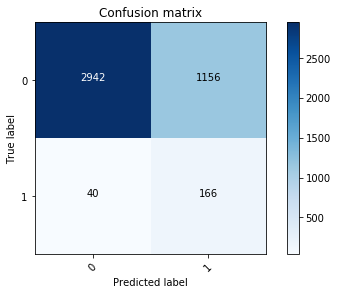

Precision =     0.126
Recall (TPR) =  0.806
Fallout (FPR) = 2.821e-01


In [26]:
cm = confusion_matrix(y_test, ypred)
plot_confusion_matrix(cm, ['0', '1'], )
pr, tpr, fpr = show_data(cm, print_res = 1);

# second way

In [27]:
param

{'max_depth': 2,
 'eta': 1,
 'objective': 'binary:logistic',
 'nthread': 4,
 'eval_metric': 'auc'}

In [28]:
clf = xgb.XGBModel(**param)

In [29]:
clf.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)], 
        eval_metric=['error','logloss'],
        verbose=True)

[0]	validation_0-error:0.052396	validation_0-logloss:0.615799	validation_1-error:0.047862	validation_1-logloss:0.615115
[1]	validation_0-error:0.052396	validation_0-logloss:0.552508	validation_1-error:0.047862	validation_1-logloss:0.551285
[2]	validation_0-error:0.052396	validation_0-logloss:0.499956	validation_1-error:0.047862	validation_1-logloss:0.498126
[3]	validation_0-error:0.052396	validation_0-logloss:0.455784	validation_1-error:0.047862	validation_1-logloss:0.453453


/home/yazi/anaconda3/envs/tf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[4]	validation_0-error:0.052396	validation_0-logloss:0.418368	validation_1-error:0.047862	validation_1-logloss:0.415528
[5]	validation_0-error:0.052396	validation_0-logloss:0.386386	validation_1-error:0.047862	validation_1-logloss:0.383061
[6]	validation_0-error:0.052396	validation_0-logloss:0.358967	validation_1-error:0.047862	validation_1-logloss:0.355184
[7]	validation_0-error:0.052396	validation_0-logloss:0.335321	validation_1-error:0.047862	validation_1-logloss:0.331073
[8]	validation_0-error:0.052396	validation_0-logloss:0.314867	validation_1-error:0.047862	validation_1-logloss:0.310268
[9]	validation_0-error:0.052396	validation_0-logloss:0.297135	validation_1-error:0.047862	validation_1-logloss:0.292105
[10]	validation_0-error:0.052396	validation_0-logloss:0.281703	validation_1-error:0.047862	validation_1-logloss:0.276297
[11]	validation_0-error:0.052396	validation_0-logloss:0.268267	validation_1-error:0.047862	validation_1-logloss:0.262469
[12]	validation_0-error:0.052396	valid

[72]	validation_0-error:0.052396	validation_0-logloss:0.16719	validation_1-error:0.047862	validation_1-logloss:0.157863
[73]	validation_0-error:0.052396	validation_0-logloss:0.166987	validation_1-error:0.047862	validation_1-logloss:0.157723
[74]	validation_0-error:0.052396	validation_0-logloss:0.166875	validation_1-error:0.047862	validation_1-logloss:0.157636
[75]	validation_0-error:0.052396	validation_0-logloss:0.166815	validation_1-error:0.047862	validation_1-logloss:0.157635
[76]	validation_0-error:0.052396	validation_0-logloss:0.166616	validation_1-error:0.047862	validation_1-logloss:0.157603
[77]	validation_0-error:0.052396	validation_0-logloss:0.166441	validation_1-error:0.047862	validation_1-logloss:0.157545
[78]	validation_0-error:0.052396	validation_0-logloss:0.166388	validation_1-error:0.04763	validation_1-logloss:0.157507
[79]	validation_0-error:0.052396	validation_0-logloss:0.166294	validation_1-error:0.04763	validation_1-logloss:0.157477
[80]	validation_0-error:0.052338	va

XGBModel(base_score=0.5, booster='gbtree', colsample_bylevel=1,
         colsample_bynode=1, colsample_bytree=1, eta=1, eval_metric='auc',
         gamma=0, importance_type='gain', learning_rate=0.1, max_delta_step=0,
         max_depth=2, min_child_weight=1, missing=None, n_estimators=100,
         n_jobs=1, nthread=4, objective='binary:logistic', random_state=0,
         reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
         subsample=1, verbosity=1)

In [30]:
evals_result = clf.evals_result()

In [32]:
print('Access logloss metric directly from validation_0:')
print(evals_result['validation_0']['logloss'])

print('')
print('Access metrics through a loop:')

for e_name, e_mtrs in evals_result.items():
    print('- {}'.format(e_name))
    for e_mtr_name, e_mtr_vals in e_mtrs.items():
        print('   - {}'.format(e_mtr_name))
        print('      - {}'.format(e_mtr_vals))
        
 
print('')
print('Access complete dict:')
print(evals_result)

Access logloss metric directly from validation_0:
[0.615223, 0.551532, 0.498582, 0.45408, 0.416376, 0.384153, 0.35651, 0.332672, 0.312002, 0.294098, 0.27848, 0.264889, 0.253024, 0.242625, 0.233522, 0.225603, 0.21861, 0.212495, 0.207159, 0.202455, 0.198338, 0.194691, 0.191553, 0.188718, 0.186237, 0.184092, 0.182159, 0.180543, 0.179033, 0.177701, 0.176523, 0.175494, 0.174645, 0.173802, 0.173149, 0.172474, 0.171958, 0.171372, 0.170922, 0.170423, 0.169968, 0.169493, 0.169201, 0.168818, 0.168439, 0.168164, 0.16784, 0.1674, 0.167062, 0.166884, 0.166617, 0.166415, 0.166135, 0.165797, 0.165608, 0.165398, 0.165242, 0.164984, 0.164737, 0.164623, 0.164394, 0.164227, 0.164077, 0.16387, 0.163735, 0.163542, 0.163437, 0.163215, 0.163041, 0.162969, 0.162831, 0.162752, 0.162639, 0.162561, 0.162454, 0.162395, 0.16228, 0.162136, 0.161985, 0.161904, 0.161813, 0.161676, 0.161526, 0.16147, 0.161298, 0.161213, 0.161104, 0.161058, 0.160982, 0.160837, 0.160782, 0.160699, 0.160562, 0.160489, 0.160432, 0.160394,

In [31]:
y_pred = clf.predict(X_test)
predictions = [round(value) for value in y_pred]

In [32]:
y_pred

array([0.13545404, 0.0698577 , 0.04456442, ..., 0.01691139, 0.01098339,
       0.04543292], dtype=float32)

In [33]:
from sklearn.metrics import accuracy_score

In [34]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 95.24%


In [35]:
from matplotlib import pyplot

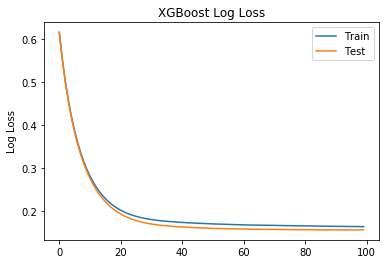

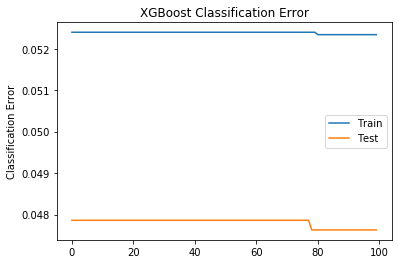

In [36]:
results =clf.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.title('XGBoost Log Loss')
pyplot.show()
# plot classification error
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
pyplot.ylabel('Classification Error')
pyplot.title('XGBoost Classification Error')
pyplot.show()

In [37]:
predictions

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

In [39]:
y_test

5118     0
14913    0
13236    0
13543    0
6088     0
        ..
20234    0
18141    0
8946     0
15363    0
21213    0
Name: parking, Length: 4304, dtype: int64

In [40]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[4098    0]
 [ 205    1]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      4098
           1       1.00      0.00      0.01       206

    accuracy                           0.95      4304
   macro avg       0.98      0.50      0.49      4304
weighted avg       0.95      0.95      0.93      4304



# third way

In [41]:
param3={'max_depth': 12,
         'subsample': 0.33,
         'objective': 'binary:logistic',
         'n_estimators':300,
         'nthread': 4,
         'learning_rate':0.06,
         'scale_pos_weight':18}

In [42]:
clf=xgb.XGBClassifier(**param3)

In [47]:
y_train

989      1
4189     0
10139    0
11770    0
12669    0
        ..
12523    0
11052    0
2950     0
4939     0
7351     0
Name: parking, Length: 17215, dtype: int64

In [48]:
%%time
clf.fit(X_train, y_train,
        early_stopping_rounds=15,
        eval_set=[(X_train, y_train), (X_test, y_test)], 
        eval_metric=['error','logloss'],
        verbose=True)

[0]	validation_0-error:0.146384	validation_0-logloss:0.654622	validation_1-error:0.172165	validation_1-logloss:0.657196
Multiple eval metrics have been passed: 'validation_1-logloss' will be used for early stopping.

Will train until validation_1-logloss hasn't improved in 15 rounds.
[1]	validation_0-error:0.105025	validation_0-logloss:0.617972	validation_1-error:0.126626	validation_1-logloss:0.623353
[2]	validation_0-error:0.104386	validation_0-logloss:0.585523	validation_1-error:0.133132	validation_1-logloss:0.592816
[3]	validation_0-error:0.101481	validation_0-logloss:0.558142	validation_1-error:0.122909	validation_1-logloss:0.567042
[4]	validation_0-error:0.100668	validation_0-logloss:0.532116	validation_1-error:0.131041	validation_1-logloss:0.543253
[5]	validation_0-error:0.097415	validation_0-logloss:0.509202	validation_1-error:0.125	validation_1-logloss:0.522067
[6]	validation_0-error:0.099971	validation_0-logloss:0.488424	validation_1-error:0.127091	validation_1-logloss:0.50280

[67]	validation_0-error:0.099274	validation_0-logloss:0.220522	validation_1-error:0.139173	validation_1-logloss:0.289953
[68]	validation_0-error:0.09817	validation_0-logloss:0.219348	validation_1-error:0.139173	validation_1-logloss:0.289596
[69]	validation_0-error:0.097705	validation_0-logloss:0.2184	validation_1-error:0.138941	validation_1-logloss:0.288971
[70]	validation_0-error:0.097415	validation_0-logloss:0.217361	validation_1-error:0.138243	validation_1-logloss:0.288814
[71]	validation_0-error:0.097415	validation_0-logloss:0.217236	validation_1-error:0.139173	validation_1-logloss:0.288914
[72]	validation_0-error:0.096602	validation_0-logloss:0.214483	validation_1-error:0.137082	validation_1-logloss:0.286658
[73]	validation_0-error:0.095905	validation_0-logloss:0.212985	validation_1-error:0.137779	validation_1-logloss:0.285951
[74]	validation_0-error:0.09695	validation_0-logloss:0.21355	validation_1-error:0.137546	validation_1-logloss:0.286841
[75]	validation_0-error:0.094336	vali

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.06, max_delta_step=0, max_depth=12,
              min_child_weight=1, missing=None, n_estimators=300, n_jobs=1,
              nthread=4, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=18, seed=None,
              silent=None, subsample=0.33, verbosity=1)

In [51]:
y_pred = clf.predict(X_test)

In [52]:
predictions = [round(value) for value in y_pred]

In [53]:
y_pred

array([0, 1, 0, ..., 0, 0, 0])

In [47]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 88.73%


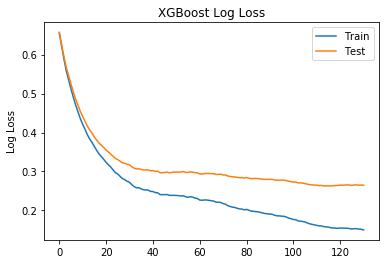

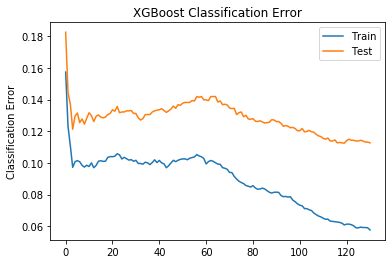

In [48]:
results =clf.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.title('XGBoost Log Loss')
pyplot.show()
# plot classification error
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
pyplot.ylabel('Classification Error')
pyplot.title('XGBoost Classification Error')
pyplot.show()

In [49]:
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[3754  314]
 [ 171   65]]
              precision    recall  f1-score   support

           0       0.96      0.92      0.94      4068
           1       0.17      0.28      0.21       236

    accuracy                           0.89      4304
   macro avg       0.56      0.60      0.58      4304
weighted avg       0.91      0.89      0.90      4304



In [50]:
import collections

In [51]:
collections.Counter(predictions)

Counter({0: 3925, 1: 379})

# oversampling

In [52]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=42)
X_res,y_res=sm.fit_resample(X,y)

In [53]:
X_train,X_test,y_train,y_test=train_test_split(X_res,y_res,test_size=0.2)

In [54]:
param4={'max_depth': 12,
         'subsample': 0.33,
         'objective': 'binary:logistic',
         'n_estimators':282,
         'nthread': 4,
         'learning_rate':0.13,
         'scale_pos_weight':18}

In [55]:
clf=xgb.XGBClassifier(**param4)

In [56]:
%%time
clf.fit(X_train, y_train,
        early_stopping_rounds=15,
        eval_set=[(X_train, y_train), (X_test, y_test)], 
        eval_metric=['error','logloss'],
        verbose=True)

[0]	validation_0-error:0.222219	validation_0-logloss:0.632471	validation_1-error:0.225107	validation_1-logloss:0.632812
Multiple eval metrics have been passed: 'validation_1-logloss' will be used for early stopping.

Will train until validation_1-logloss hasn't improved in 15 rounds.
[1]	validation_0-error:0.211961	validation_0-logloss:0.583306	validation_1-error:0.21286	validation_1-logloss:0.58436
[2]	validation_0-error:0.213951	validation_0-logloss:0.551369	validation_1-error:0.218494	validation_1-logloss:0.553881
[3]	validation_0-error:0.205346	validation_0-logloss:0.524186	validation_1-error:0.209553	validation_1-logloss:0.52724
[4]	validation_0-error:0.203264	validation_0-logloss:0.502062	validation_1-error:0.209553	validation_1-logloss:0.505415
[5]	validation_0-error:0.203264	validation_0-logloss:0.489378	validation_1-error:0.206124	validation_1-logloss:0.492653
[6]	validation_0-error:0.201366	validation_0-logloss:0.477537	validation_1-error:0.204042	validation_1-logloss:0.48124

[67]	validation_0-error:0.110727	validation_0-logloss:0.257023	validation_1-error:0.1297	validation_1-logloss:0.319055
[68]	validation_0-error:0.109747	validation_0-logloss:0.254191	validation_1-error:0.128598	validation_1-logloss:0.317258
[69]	validation_0-error:0.108522	validation_0-logloss:0.25209	validation_1-error:0.127985	validation_1-logloss:0.315662
[70]	validation_0-error:0.107665	validation_0-logloss:0.251336	validation_1-error:0.128475	validation_1-logloss:0.315483
[71]	validation_0-error:0.107297	validation_0-logloss:0.250352	validation_1-error:0.12823	validation_1-logloss:0.315137
[72]	validation_0-error:0.106409	validation_0-logloss:0.248093	validation_1-error:0.126883	validation_1-logloss:0.313731
[73]	validation_0-error:0.105245	validation_0-logloss:0.246244	validation_1-error:0.125658	validation_1-logloss:0.312105
[74]	validation_0-error:0.104021	validation_0-logloss:0.243742	validation_1-error:0.124923	validation_1-logloss:0.309561
[75]	validation_0-error:0.103776	val

[135]	validation_0-error:0.061794	validation_0-logloss:0.151459	validation_1-error:0.098836	validation_1-logloss:0.249181
[136]	validation_0-error:0.060906	validation_0-logloss:0.149787	validation_1-error:0.098592	validation_1-logloss:0.248389
[137]	validation_0-error:0.060508	validation_0-logloss:0.148305	validation_1-error:0.097612	validation_1-logloss:0.247552
[138]	validation_0-error:0.060508	validation_0-logloss:0.148587	validation_1-error:0.097367	validation_1-logloss:0.24813
[139]	validation_0-error:0.059987	validation_0-logloss:0.146914	validation_1-error:0.096632	validation_1-logloss:0.246853
[140]	validation_0-error:0.060232	validation_0-logloss:0.146678	validation_1-error:0.09602	validation_1-logloss:0.246632
[141]	validation_0-error:0.059528	validation_0-logloss:0.145913	validation_1-error:0.096387	validation_1-logloss:0.245697
[142]	validation_0-error:0.059589	validation_0-logloss:0.144474	validation_1-error:0.095775	validation_1-logloss:0.245515
[143]	validation_0-error:0

[203]	validation_0-error:0.040236	validation_0-logloss:0.104511	validation_1-error:0.084752	validation_1-logloss:0.229425
[204]	validation_0-error:0.040236	validation_0-logloss:0.10428	validation_1-error:0.085854	validation_1-logloss:0.22984
[205]	validation_0-error:0.040236	validation_0-logloss:0.103915	validation_1-error:0.085242	validation_1-logloss:0.229584
[206]	validation_0-error:0.040175	validation_0-logloss:0.10408	validation_1-error:0.085854	validation_1-logloss:0.229918
[207]	validation_0-error:0.0399	validation_0-logloss:0.103408	validation_1-error:0.085119	validation_1-logloss:0.229424
[208]	validation_0-error:0.0399	validation_0-logloss:0.103303	validation_1-error:0.084752	validation_1-logloss:0.229919
[209]	validation_0-error:0.039746	validation_0-logloss:0.103318	validation_1-error:0.085854	validation_1-logloss:0.230149
[210]	validation_0-error:0.039624	validation_0-logloss:0.102973	validation_1-error:0.085977	validation_1-logloss:0.230009
[211]	validation_0-error:0.0393

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.13, max_delta_step=0, max_depth=12,
              min_child_weight=1, missing=None, n_estimators=282, n_jobs=1,
              nthread=4, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=18, seed=None,
              silent=None, subsample=0.33, verbosity=1)

In [57]:
y_pred = clf.predict(X_test)
predictions = [round(value) for value in y_pred]

In [58]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 91.82%


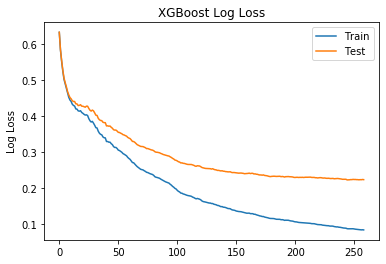

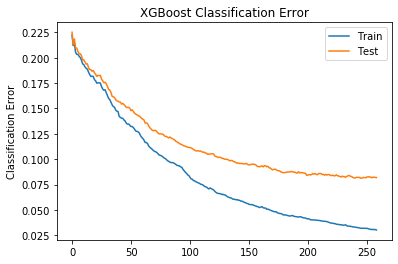

In [59]:
results =clf.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.title('XGBoost Log Loss')
pyplot.show()
# plot classification error
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
pyplot.ylabel('Classification Error')
pyplot.title('XGBoost Classification Error')
pyplot.show()

In [60]:
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[3497  554]
 [ 114 4000]]
              precision    recall  f1-score   support

           0       0.97      0.86      0.91      4051
           1       0.88      0.97      0.92      4114

    accuracy                           0.92      8165
   macro avg       0.92      0.92      0.92      8165
weighted avg       0.92      0.92      0.92      8165



In [61]:
collections.Counter(y_pred)

Counter({1: 4554, 0: 3611})

# Prediction on AFC

In [62]:
scaler = StandardScaler()
X0 = scaler.fit_transform(file)
X0

array([[-1.10165604, -1.21512452, -0.17738113,  0.85520398, -0.11471561],
       [-0.12573111,  1.1976657 ,  2.8932032 ,  3.28815296,  0.73442831],
       [-1.09977777,  0.47995172,  3.51393893,  0.85520398, -0.38551987],
       ...,
       [ 0.7737926 ,  0.67654986, -0.26117054,  0.24696674,  2.43363096],
       [ 0.78528316,  0.68837531, -0.26117054,  0.24696674,  2.43363096],
       [ 0.74142013,  0.64323392, -0.26117054,  0.24696674,  2.43363096]])

In [63]:
prediction0=clf.predict(X0)
prediction0

array([1, 0, 0, ..., 1, 1, 1])

In [64]:
collections.Counter(prediction0)

Counter({1: 176144, 0: 169566})

In [65]:
176144/(176144+169566)

0.5095137543027393